##  **Exploratory Data Analysis** (EDA)

En el documento 'etl.ipynb' se realizó un primer análisis y limpieza de datos. Corresponde ahora investigar relaciones
entre las variables, outliers, patrones o cualquier otra consideración de relevancia para el sistema de recomendación.

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r'C:\Users\GASTON\Desktop\PI1\DATA\movies_credits.csv', encoding= 'utf8', low_memory=False)
df.head(3)

,id,spoken_languagesname,genresname,title,budget,revenue,overview,release_date,vote_average,vote_count,popularity,runtime,status,tagline,production_companiesname,production_countriesname,release_year,return,director,actor
0,100,English,"Crime, Comedy","Lock, Stock and Two Smoking Barrels",1350000.0,3897569.0,A card sharp and his unwillingly-enlisted frie...,1998-03-05,7.5,1671.0,4.607860,105.0,Released,A Disgrace to Criminals Everywhere.,Handmade Films Ltd.,United Kingdom,1998,2.887088,Guy Ritchie,"Jason Flemyng, Dexter Fletcher, Nick Moran, Ja..."
1,10000,Español,"Drama, Comedy",La estrategia del caracol,0.0,0.0,A group of tenants living in an old house are ...,1993-12-25,7.2,9.0,0.281609,116.0,Released,Sin Datos,Ministère de la Culture et de la Francophonie,Colombia,1993,0.000000,Sergio Cabrera,NaN
2,10001,English,"Science Fiction, Comedy",Young Einstein,0.0,0.0,Albert Einstein is the son of a Tasmanian appl...,1988-12-15,4.5,46.0,2.562888,91.0,Released,E=mc²,Warner Bros.,Australia,1988,0.000000,Yahoo Serious,"Yahoo Serious, Odile Le Clezio, Peewee Wilson,..."


In [6]:
df.dtypes #Ante todo, corresponde ver si el DataFrame tiene las columnas con el tipo de datos correcto.

id                            int64
spoken_languagesname         object
genresname                   object
title                        object
budget                      float64
revenue                     float64
overview                     object
release_date                 object
vote_average                float64
vote_count                  float64
popularity                  float64
runtime                      object
status                       object
tagline                      object
production_companiesname     object
production_countriesname     object
release_year                  int64
return                      float64
director                     object
actor                        object
dtype: object

In [12]:
#Corregimos los tipos de datos de las columnas.
df['id'] = df['id'].astype('int64')
df['release_date']= (pd.to_datetime(df['release_date'],errors='coerce'))
df['runtime'] =(pd.to_numeric(df['runtime'],errors= 'coerce'))

## Tratamiento de Nulos

Corresponde chequear la existencia de valores nulos en el Dataset

In [22]:
df.isnull().sum() #No tengo valores nulos

id                             0
spoken_languagesname        3891
genresname                  2384
title                          0
budget                         0
revenue                        0
overview                       5
release_date                   0
vote_average                   0
vote_count                     0
popularity                     0
runtime                      246
status                         0
tagline                        1
production_companiesname       0
production_countriesname       0
release_year                   0
return                         0
director                     836
actor                       2474
dtype: int64

En primer lugar, se observa la existencia de valores nulos en las columnas de 'Director' y 'Actor'. 

In [23]:
df_nulos = df.copy()
df_nulos.head(1)

,id,spoken_languagesname,genresname,title,budget,revenue,overview,release_date,vote_average,vote_count,popularity,runtime,status,tagline,production_companiesname,production_countriesname,release_year,return,director,actor
0,100,English,"Crime, Comedy","Lock, Stock and Two Smoking Barrels",1350000.0,3897569.0,A card sharp and his unwillingly-enlisted frie...,1998-03-05,7.5,1671.0,4.60786,105.0,Released,A Disgrace to Criminals Everywhere.,Handmade Films Ltd.,United Kingdom,1998,2.887088,Guy Ritchie,"Jason Flemyng, Dexter Fletcher, Nick Moran, Ja..."


In [25]:
#Se crean nuevas columnas para que interactúen con otras, y así poder comparar con presupuesto y popularidad.
df_nulos['is_director_null'] = df['director'].isnull()
df_nulos['is_actor_null'] = df['actor'].isnull()
df_nulos.columns

Index(['id', 'spoken_languagesname', 'genresname', 'title', 'budget',
       'revenue', 'overview', 'release_date', 'vote_average', 'vote_count',
       'popularity', 'runtime', 'status', 'tagline',
       'production_companiesname', 'production_countriesname', 'release_year',
       'return', 'director', 'actor', 'is_director_null', 'is_actor_null'],
      dtype='object')

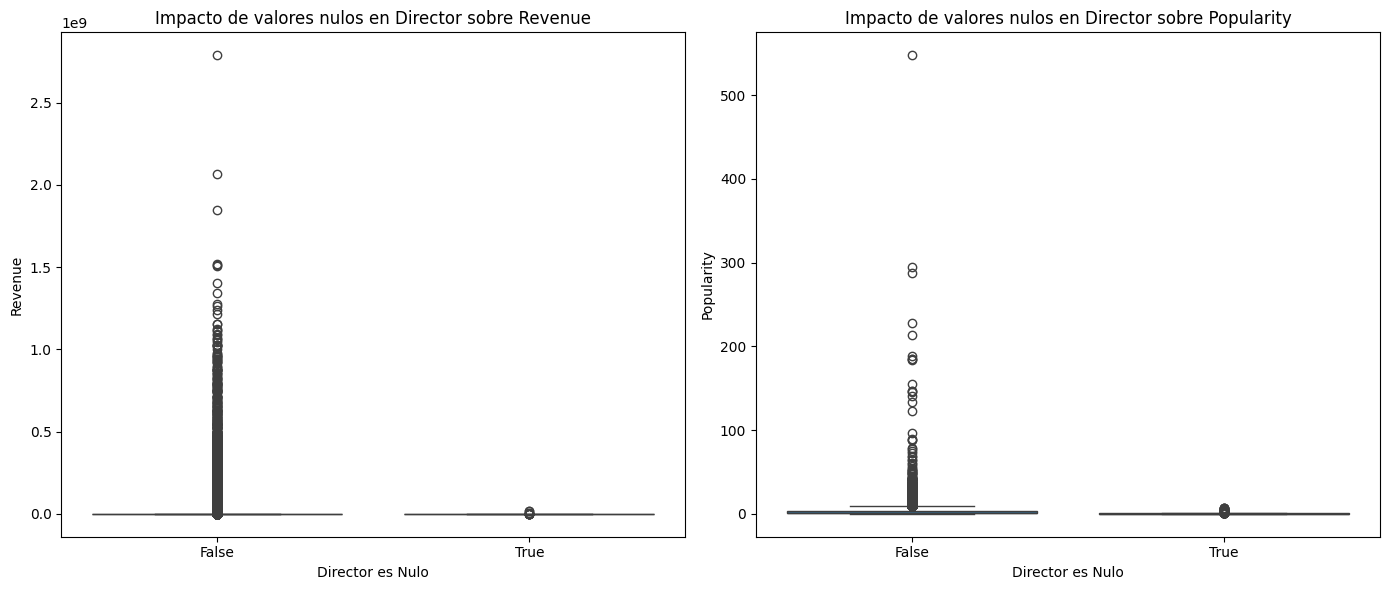

In [31]:
# Creamos una figura con dos subplots
# En una se comparará el director con 'Revenue' (Ganancia) y en la otra con 'popularity' (Popularidad)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6)) 

sns.boxplot(x='is_director_null', y='revenue', data=df_nulos, ax=axes[0])
axes[0].set_title('Impacto de valores nulos en Director sobre Revenue')
axes[0].set_xlabel('Director es Nulo')
axes[0].set_ylabel('Revenue')

# A la derecha mostraremos el impacto de los valores nulos sobre 'Popularity'
sns.boxplot(x='is_director_null', y='popularity', data=df_nulos, ax=axes[1])
axes[1].set_title('Impacto de valores nulos en Director sobre Popularity')
axes[1].set_xlabel('Director es Nulo')
axes[1].set_ylabel('Popularity')

plt.tight_layout()
plt.show()

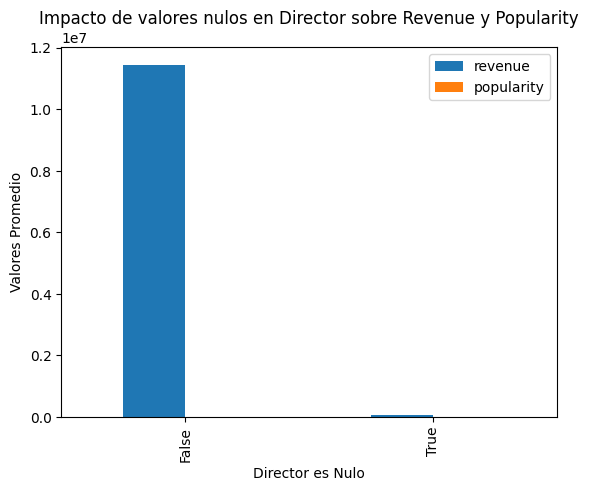

In [32]:
df_nulos.groupby('is_director_null')[['revenue', 'popularity']].mean().plot(kind='bar')
plt.title('Impacto de valores nulos en Director sobre Revenue y Popularity')
plt.xlabel('Director es Nulo')
plt.ylabel('Valores Promedio')
plt.show()

Podemos observar que los valores nulos o faltantes para 'Director' no suponen implicancias significantes en ganancia ni en la popularidad de la filmación.

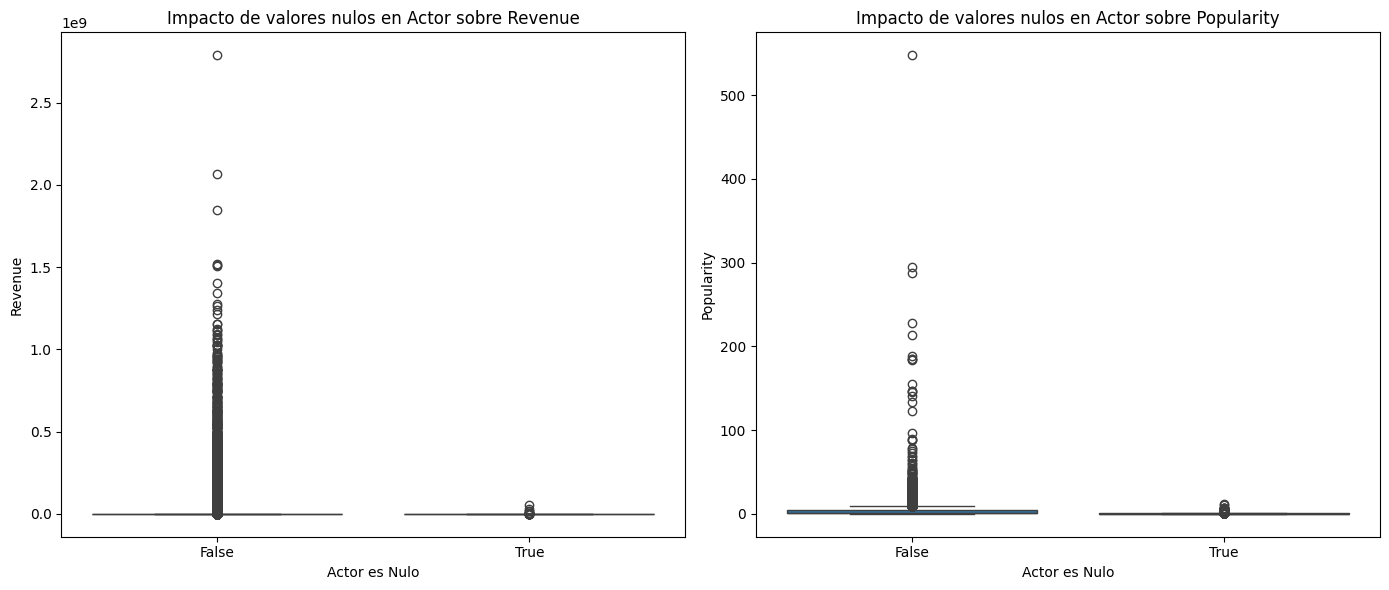

In [34]:
#Repetimos el proceso, para comparar las mismas métricas, pero esta vez con 'Actor'.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6)) 

sns.boxplot(x='is_actor_null', y='revenue', data=df_nulos, ax=axes[0])
axes[0].set_title('Impacto de valores nulos en Actor sobre Revenue')
axes[0].set_xlabel('Actor es Nulo')
axes[0].set_ylabel('Revenue')

# A la derecha mostraremos el impacto de los valores nulos sobre 'Popularity'
sns.boxplot(x='is_actor_null', y='popularity', data=df_nulos, ax=axes[1])
axes[1].set_title('Impacto de valores nulos en Actor sobre Popularity')
axes[1].set_xlabel('Actor es Nulo')
axes[1].set_ylabel('Popularity')

plt.tight_layout()
plt.show()

Al igual que para el caso de 'Director', los campos faltantes o nulos en la columna 'actor' carecen de relevancia en el dataset (tomándose como parámetro su incidencia en popularidad de la película y ganancia).<br>
De esta forma, **se pueden eliminar las filas con datos nulos o valores faltantes para estas columnas**.

In [35]:
df = df.dropna(subset=['actor', 'director'])

print(df.isnull().sum())# Verificamos que no existan nulos en esas columnas

id                             0
spoken_languagesname        2790
genresname                  1658
title                          0
budget                         0
revenue                        0
overview                       4
release_date                   0
vote_average                   0
vote_count                     0
popularity                     0
runtime                      198
status                         0
tagline                        1
production_companiesname       0
production_countriesname       0
release_year                   0
return                         0
director                       0
actor                          0
dtype: int64


En el proceso de ETL se identificaron los primeros valores nulos, y aplicó una función para reemplazar según el tipo de dato.

In [44]:
#Función utilizada
def reemplazarNulos(df, columna, valor):
    """
    Esta función rellena los valores NaN en una columna específica de un DataFrame.
    Se esperan tres (3) parámentros:
    df (DataFrame): Sobre este DataFrame se realizará la operación.
    columna (str): Es el nombre de la columna del DataFrame en la que se reemplazarán los valores.
    valor: El valor con el que sr reemplazan los NaN en la columna.

    Se retorna un DataFrame con los nulos rellenados en las columnas indicadas.

    Si debo rellenar múltiples columnas con diferentes valores, se puede mapear un diccionario de claves-valor y aplicar la función de manera iterativa.
    """
    df.loc[:, columna] = df[columna].fillna(valor)
    return df

In [51]:
#La volvemos a aplicar sobre los nuevos valores

mapeo_nulos = {
    'spoken_languagesname': 'Sin Datos',
    'genresname': 'Sin Datos',
    'runtime': 'Sin Datos',
    'status': 'Sin Datos',
    'tagline': 'Sin Datos',
    'overview': 'Sin Datos',}

for columna, dato in mapeo_nulos.items():
    df = reemplazarNulos(df, columna, dato)

In [52]:
df.isnull().sum() #No tengo valores nulos

id                          0
spoken_languagesname        0
genresname                  0
title                       0
budget                      0
revenue                     0
overview                    0
release_date                0
vote_average                0
vote_count                  0
popularity                  0
runtime                     0
status                      0
tagline                     0
production_companiesname    0
production_countriesname    0
release_year                0
return                      0
director                    0
actor                       0
dtype: int64

Si bien ahora no tenemos valores "Nulos", si tenemos campos con el valor "Sin Datos".

In [20]:
df[['budget','revenue','return','vote_average','vote_count','popularity']].describe() #Sólo numéricos

,budget,revenue,return,vote_average,vote_count,popularity
count,4.534600e+04,4.534600e+04,4.534600e+04,45346.000000,45346.000000,45346.000000
mean,4.232580e+06,1.123366e+07,6.604792e+02,5.624196,110.135293,2.926188
std,1.744373e+07,6.440990e+07,7.471800e+04,1.915339,491.899276,6.010970
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,5.000000,3.000000,0.388732
50%,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,10.000000,1.130176
75%,0.000000e+00,0.000000e+00,0.000000e+00,6.800000,34.000000,3.689337
max,3.800000e+08,2.787965e+09,1.239638e+07,10.000000,14075.000000,547.488298
